In [1]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading csv file into pandas dataframe

# read ratings file
ratings = pd.read_csv('ratings2.csv')

# read properties data file
property_info = pd.read_csv('propertiesprocessed.csv')
property_info.set_index('property_id', inplace=True)

In [3]:
ratings.head()

,userId,propertyId,rating
0,1,7,4
1,1,32,2
2,1,70,3
3,1,76,4
4,1,168,5


In [4]:
ratings.tail()

,userId,propertyId,rating
774,80,288,4
775,80,555,4
776,80,908,4
777,80,1203,5
778,80,1258,4


In [5]:
ratings.shape

(779, 3)

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   userId      779 non-null    int64
 1   propertyId  779 non-null    int64
 2   rating      779 non-null    int64
dtypes: int64(3)
memory usage: 18.4 KB


In [7]:
# DATA SPLITTING

from sklearn.model_selection import train_test_split

# Data Training Size = 70%
# Data Testing Size = 30%
X_train, X_test = train_test_split(ratings, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(545, 3)
(234, 3)


In [8]:
import pandas as pd

# Read the existing ratings.csv file
ratings = pd.read_csv('ratings2.csv')

# Drop duplicate entries based on 'userId' and 'propertyId'
ratings = ratings.drop_duplicates(subset=['userId', 'propertyId'], keep='last')

# Save the updated ratings to ratings.csv
ratings.to_csv('ratings2.csv', index=False)


In [9]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'propertyId', values = 'rating').fillna(0)
user_data.head()

propertyId,2,3,4,5,6,7,8,10,11,13,...,1597,1604,1608,1610,1616,1674,1682,1687,1721,1732
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
# The properties not rated by user is marked as 1 for prediction 
dummy_train = dummy_train.pivot(index = 'userId', columns = 'propertyId', values = 'rating').fillna(1)

# The properties not rated by user is marked as 0 for evaluation 
dummy_test = dummy_test.pivot(index ='userId', columns = 'propertyId', values = 'rating').fillna(0)

In [12]:
dummy_train.head()

propertyId,2,3,4,5,6,7,8,10,11,13,...,1597,1604,1608,1610,1616,1674,1682,1687,1721,1732
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
dummy_test.head()

propertyId,6,10,16,17,19,32,36,41,44,45,...,1590,1597,1617,1619,1639,1693,1704,1721,1784,1805
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#ITEM BASED COLLABORATIVE FILTERING

In [15]:
#set property features
property_features = X_train.pivot(index = 'propertyId', columns = 'userId', values = 'rating').fillna(0)
property_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
propertyId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(property_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
- - - - - - - - - - 
(376, 376)


In [17]:
#Predicting User Ratings

item_predicted_ratings = np.dot(property_features.T, item_similarity)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.19522861, 2.20863052,
        0.        ],
       ...,
       [8.13237404, 0.        , 0.        , ..., 0.        , 2.1759707 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.74077656,
        0.        ],
       [0.        , 0.        , 1.69705627, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
item_predicted_ratings.shape

(79, 376)

In [19]:
dummy_train.shape

(79, 376)

In [20]:
#Filtering the ratings only for the properties not already rated by the user for recommendation

# np.multiply for cell-by-cell multiplication 

item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

propertyId,2,3,4,5,6,7,8,10,11,13,...,1597,1604,1608,1610,1616,1674,1682,1687,1721,1732
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.19257,0.0,2.12132,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.264911,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,1.195229,2.208631,0.000000
4,0.0,0.0,0.0,2.649065,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.000000,0.0,1.107823,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,1.477098


In [21]:
#EXAMPLE OUTPUT

user_id = 8

# Function to get property info based on property_id
def get_property_info(property_id):
    return property_info.loc[property_id]

# Modify the recommendation output code
top_properties = item_final_ratings.iloc[user_id].sort_values(ascending=False)[0:5]

unrated_properties = user_data.loc[user_id][user_data.loc[user_id] == 0].index
# Filter top rated properties to include only unrated ones
top_unrated_properties = top_properties[top_properties.index.isin(unrated_properties)].head(5)

# Display property name along with propertyId
for property_id, rating in top_unrated_properties.items():
    property_name = get_property_info(property_id)['prop_name']
    print(f"Property ID: {property_id}, Property Name: {property_name}, Rating: {rating}")
    print("\n")


Property ID: 532, Property Name: The Zizz, Rating: 3.52703911883897


Property ID: 838, Property Name: Gravit 8 Klang Serviced Apartment, Rating: 3.52703911883897


Property ID: 637, Property Name: Pangsapuri Seri Saujana (Saujana Putra), Rating: 3.52703911883897


Property ID: 912, Property Name: Anyaman Residence, Rating: 3.52703911883897


Property ID: 41, Property Name: Mesra Villa, Rating: 2.5724787771376323




In [22]:
#EVALUATION

test_item_features = X_test.pivot(index = 'propertyId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.43314808 0.         ... 0.         0.         0.        ]
 [0.43314808 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(197, 197)


In [23]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

propertyId,6,10,16,17,19,32,36,41,44,45,...,1590,1597,1617,1619,1639,1693,1704,1721,1784,1805
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ratings['rating'].describe()

count    779.000000
mean       3.682927
std        0.975723
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [26]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [27]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

234

In [28]:
test = X_test.pivot(index = 'userId', columns = 'propertyId', values = 'rating')
test.head()

propertyId,6,10,16,17,19,32,36,41,44,45,...,1590,1597,1617,1619,1639,1693,1704,1721,1784,1805
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

3.02142578250205


In [30]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.7631408363503676


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predictions to binary values (1 if predicted rating > threshold, 0 otherwise)
threshold = 3.5  # You can adjust this threshold based on your rating scale
binary_predictions = (pred > threshold).astype(int)

# Flatten the true and predicted ratings matrices
flat_test = test.values.flatten()
flat_predictions = binary_predictions.flatten()

# Remove NaN values
nan_indices = np.isnan(flat_test)
flat_test = flat_test[~nan_indices]
flat_predictions = flat_predictions[~nan_indices]

# Calculate precision, recall, and F1 score with micro average
precision = precision_score(flat_test, flat_predictions, average='micro')
recall = recall_score(flat_test, flat_predictions, average='micro')
f1 = f1_score(flat_test, flat_predictions, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [32]:
import pandas as pd
from fuzzywuzzy import process

# Load data from 'propertiesprocessed.csv'
data = pd.read_csv('propertiesprocessed.csv')

def search_property_name(user_input, region_filter=None, location_filter=None, threshold=80):
    # Use fuzzywuzzy process.extract to get matches with a score
    matches = process.extract(user_input, data['prop_name'])
    
    # Filter matches based on the threshold score
    filtered_matches = [match for match in matches if match[1] >= threshold]

    # Extract property names, scores, and regions from filtered matches
    results = [{'property_id': data.loc[match[2], 'property_id'],
                'prop_name': data.loc[match[2], 'prop_name'],
                'score': match[1],
                'region': data.loc[match[2], 'region'],
                'location': data.loc[match[2], 'location']} for match in filtered_matches]

    # Filter results based on region if specified by the user
    if region_filter is not None and len(region_filter) > 0:
        results = [result for result in results if result['region'] in region_filter]
        
    if location_filter and len(location_filter) > 0:
            results = [result for result in results if result['location'] == location_filter]
    
    return results

# Example usage
user_input = "Apartment"
user_region_preference = ['Selangor']  # Replace with the user's region preference or leave it as an empty list
location_filter = ['Gombak']
search_results = search_property_name(user_input, region_filter=user_region_preference, location_filter=location_filter)

# Display search results
print("Search Results:")
for result in search_results:
    print(f"Property ID: {result['property_id']}, Property Name: {result['prop_name']}, Score: {result['score']}, Region: {result['region']}, Location: {result['location']}")


c:\Users\Nuha Batrisyia\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Search Results:


In [33]:
# Display actual values (ratings given by users)
print("Actual Values:")
print(test.head())

# Display predicted values
print("\nPredicted Values:")
print(pd.DataFrame(pred, index=test.index, columns=test.columns).head())


Actual Values:
propertyId  6     10    16    17    19    32    36    41    44    45    ...  \
userId                                                                  ...   
1            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0  ...   
3            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

propertyId  1590  1597  1617  1619  1639  1693  1704  1721  1784  1805  
userId                                                                  
1            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

In [34]:
import pandas as pd

# Assuming test and pred DataFrames have the same index and columns
actual_vs_predicted = pd.concat([test.add_suffix('_actual'), pd.DataFrame(pred, index=test.index, columns=test.columns).add_suffix('_predicted')], axis=1)

# Display the combined DataFrame
print(actual_vs_predicted.head())


propertyId  6_actual  10_actual  16_actual  17_actual  19_actual  32_actual  \
userId                                                                        
1                NaN        NaN        NaN        NaN        NaN        NaN   
2                NaN        NaN        NaN        NaN        NaN        NaN   
3                NaN        NaN        NaN        NaN        NaN        NaN   
4                NaN        NaN        NaN        NaN        NaN        NaN   
5                NaN        NaN        NaN        NaN        NaN        NaN   

propertyId  36_actual  41_actual  44_actual  45_actual  ...  1590_predicted  \
userId                                                  ...                   
1                 NaN        NaN        NaN        NaN  ...             NaN   
2                 NaN        NaN        NaN        3.0  ...             NaN   
3                 NaN        NaN        NaN        NaN  ...             NaN   
4                 NaN        NaN        NaN        

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

def normalize(matrix):
    # Compute the magnitude of each row
    magnitude = np.sqrt(np.square(matrix).sum(axis=1))

    # Avoid division by zero
    magnitude[magnitude == 0] = 1
    
    # Normalize the matrix
    return matrix.divide(magnitude, axis=0)

def get_actual_and_predicted_ratings(user_id):
    # Load ratings data and preprocess
    ratings = pd.read_csv('ratings2.csv')
    
    # Split the data into training and testing sets
    X_train, _ = train_test_split(ratings, test_size=0.30, random_state=42)

    # Pivot ratings into user-item matrix
    user_item_matrix = X_train.pivot(index='userId', columns='propertyId', values='rating').fillna(0)

    # Normalize the user-item matrix
    user_item_matrix_normalized = normalize(user_item_matrix)

    # Compute item-item similarity using cosine similarity
    item_similarity = cosine_similarity(user_item_matrix_normalized.T)

    # Predict ratings for the given user
    user_ratings = user_item_matrix_normalized.loc[user_id]

    # Mask already rated items in the item similarity matrix
    item_similarity[user_ratings > 0] = 0

    # Debug: Print the item-item similarity matrix
    print("Item-Item Similarity Matrix:")
    print(item_similarity)

    # Predicted ratings for the given user
    predicted_ratings = np.dot(user_ratings, item_similarity)
    
    return user_ratings[user_ratings > 0], predicted_ratings[user_ratings > 0]

# Example usage:
user_id_to_check = 2
actual_ratings, predicted_ratings = get_actual_and_predicted_ratings(user_id_to_check)
print(f"Actual Ratings for User {user_id_to_check}:\n{actual_ratings}")
print(f"Predicted Ratings for User {user_id_to_check}:\n{predicted_ratings}")


Item-Item Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Actual Ratings for User 2:
propertyId
8       0.262111
79      0.262111
101     0.436852
170     0.262111
288     0.174741
350     0.436852
1278    0.436852
1449    0.436852
Name: 2, dtype: float64
Predicted Ratings for User 2:
[0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load the ratings data
ratings_df = pd.read_csv('ratings2.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_df, test_size=0.3, random_state=42)

# Create a user-item matrix for training data
user_item_matrix = train_data.pivot_table(index='userId', columns='propertyId', values='rating')

# Fill missing values with 0
user_item_matrix = user_item_matrix.fillna(0)

# Compute item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)

def predict_rating(user_ratings, item_similarity):
    # Reshape item_similarity if necessary
    item_similarity = item_similarity.reshape(1, -1) if item_similarity.ndim == 1 else item_similarity
    
    # Weighted sum of ratings based on item similarity
    return user_ratings.dot(item_similarity.T) / (item_similarity.sum() + 1e-9)

# Make predictions for the test set
test_predictions = []

for index, row in test_data.iterrows():
    user_id = row['userId']
    property_id = row['propertyId']
    
    # Check if property_id is present in the training data
    if property_id in user_item_matrix.columns:
        # Extract the user ratings and item similarity for the given property_id
        user_ratings = user_item_matrix.loc[user_id].values
        similarity_scores = item_similarity[user_item_matrix.columns.get_loc(property_id)]
        
        # Make a prediction based on the user's ratings and item similarity
        prediction = predict_rating(user_ratings, similarity_scores)
        
        test_predictions.append(prediction)
    else:
        # If property_id is not present in the training data, use a default value
        test_predictions.append(0)

# Convert the predictions list to a NumPy array
test_predictions = pd.Series(test_predictions)

# Extract the actual ratings from the test set
actual_ratings = test_data['rating']

# Create a DataFrame to display actual and predicted ratings side by side
results_df = pd.DataFrame({'Actual Ratings': actual_ratings, 'Predicted Ratings': test_predictions})

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_ratings, test_predictions)
rmse = mean_squared_error(actual_ratings, test_predictions, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 3.6664250353524808
Root Mean Squared Error (RMSE): 3.7870355882613183


Mean Absolute Error (MAE): 3.6664250353524808
Root Mean Squared Error (RMSE): 3.7870355882613183


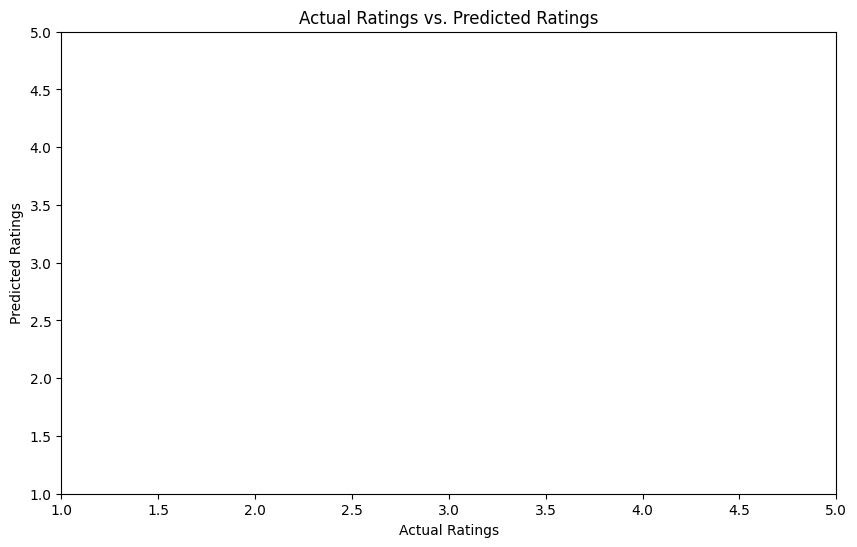

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load the ratings data
ratings_df = pd.read_csv('ratings2.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_df, test_size=0.3, random_state=42)

# Create a user-item matrix for training data
user_item_matrix = train_data.pivot_table(index='userId', columns='propertyId', values='rating')

# Fill missing values with 0
user_item_matrix = user_item_matrix.fillna(0)

# Compute item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)

def predict_rating(user_ratings, item_similarity):
    # Reshape item_similarity if necessary
    item_similarity = item_similarity.reshape(1, -1) if item_similarity.ndim == 1 else item_similarity
    
    # Weighted sum of ratings based on item similarity
    return user_ratings.dot(item_similarity.T) / (item_similarity.sum() + 1e-9)

# Make predictions for the test set
test_predictions = []

for index, row in test_data.iterrows():
    user_id = row['userId']
    property_id = row['propertyId']
    
    # Check if property_id is present in the training data
    if property_id in user_item_matrix.columns:
        # Extract the user ratings and item similarity for the given property_id
        user_ratings = user_item_matrix.loc[user_id].values
        similarity_scores = item_similarity[user_item_matrix.columns.get_loc(property_id)]
        
        # Make a prediction based on the user's ratings and item similarity
        prediction = predict_rating(user_ratings, similarity_scores)
        
        test_predictions.append(prediction)
    else:
        # If property_id is not present in the training data, use a default value
        test_predictions.append(0)

# Convert the predictions list to a NumPy array
test_predictions = pd.Series(test_predictions)

# Extract the actual ratings from the test set
actual_ratings = test_data['rating']

# Create a DataFrame to display actual and predicted ratings side by side
results_df = pd.DataFrame({'Actual Ratings': actual_ratings, 'Predicted Ratings': test_predictions})

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_ratings, test_predictions)
rmse = mean_squared_error(actual_ratings, test_predictions, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(actual_ratings, test_predictions, alpha=0.5)
plt.title('Actual Ratings vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.xlim(1.0, 5.0)  # Set x-axis limits from 1.0 to 5.0
plt.ylim(1.0, 5.0)  # Set y-axis limits from 1.0 to 5.0
plt.show()



In [81]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Load the ratings data
ratings_df = pd.read_csv('ratings2.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_df, test_size=0.3, random_state=42)

# Create a user-item matrix for training data
user_item_matrix = train_data.pivot_table(index='userId', columns='propertyId', values='rating')

# Fill missing values with 0
user_item_matrix = user_item_matrix.fillna(0)

# Compute item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)

def predict_rating(user_id, property_id):
    # Extract the user ratings and item similarity for the given user and property
    user_ratings = user_item_matrix.loc[user_id].values
    similarity_scores = item_similarity[user_item_matrix.columns.get_loc(property_id)]
    
    # Calculate the weighted sum of ratings based on item similarity
    weighted_sum = user_ratings.dot(similarity_scores)
    
    # Normalize the prediction
    prediction = weighted_sum / (similarity_scores.sum() + 1e-9)
    
    return prediction

# Example usage:
user_id = 1
property_id = 1391
actual_rating = user_item_matrix.loc[user_id, property_id]
predicted_rating = predict_rating(user_id, property_id)

print(f"Actual Rating for User {user_id} and Property {property_id}: {actual_rating}")
print(f"Predicted Rating for User {user_id} and Property {property_id}: {predicted_rating}")


Actual Rating for User 1 and Property 1391: 0.0
Predicted Rating for User 1 and Property 1391: 0.0


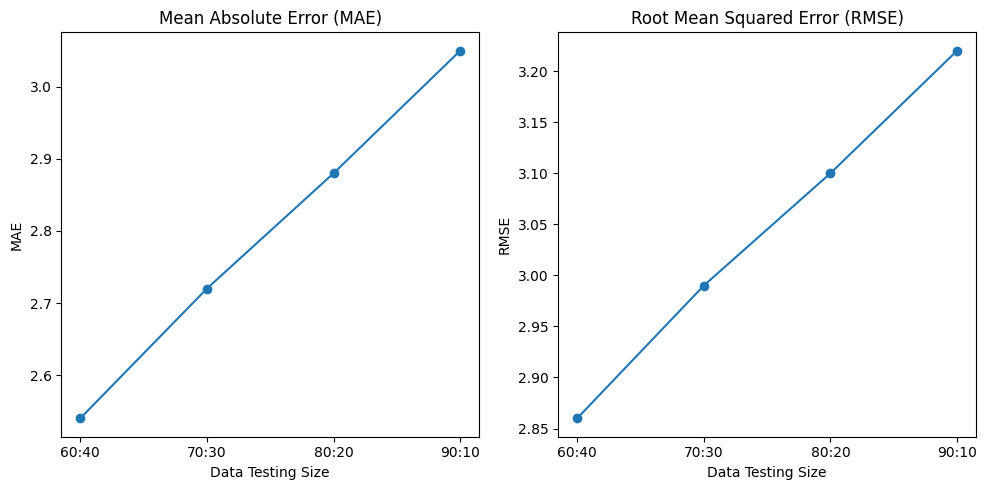

In [38]:
import matplotlib.pyplot as plt

# Data
training_sizes = ['60:40', '70:30', '80:20', '90:10']
mae_values = [2.54, 2.72, 2.88, 3.05]
rmse_values = [2.86, 2.99, 3.10, 3.22]

# Plotting MAE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_sizes, mae_values, marker='o', linestyle='-')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Data Testing Size')
plt.ylabel('MAE')

# Plotting RMSE
plt.subplot(1, 2, 2)
plt.plot(training_sizes, rmse_values, marker='o', linestyle='-')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Data Testing Size')
plt.ylabel('RMSE')

# Show the plots
plt.tight_layout()
plt.show()


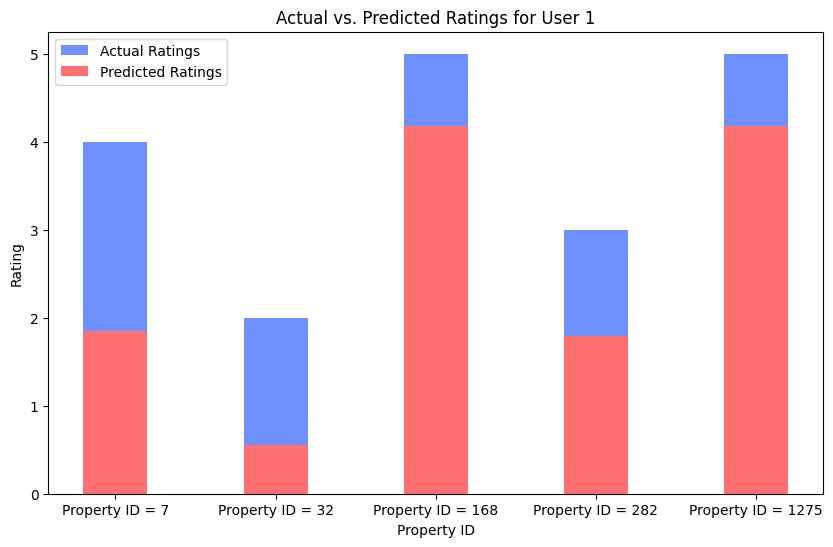

In [89]:
import matplotlib.pyplot as plt

# Data
property_ids = ['Property ID = 7', 'Property ID = 32', 'Property ID = 168', 'Property ID = 282', 'Property ID = 1275']
actual_ratings = [4, 2, 5, 3, 5]
predicted_ratings = [1.85, 0.55, 4.18, 1.79, 4.18]

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(property_ids, actual_ratings, color='#6F90FF', width=0.4, label='Actual Ratings')
plt.bar(property_ids, predicted_ratings, color='#FF6F6F', width=0.4, label='Predicted Ratings')
plt.xlabel('Property ID')
plt.ylabel('Rating')
plt.title('Actual vs. Predicted Ratings for User 1')
plt.legend()
plt.show()
